<a href="https://colab.research.google.com/github/KumarPatil23/CODSOFT/blob/main/Task_2_Movie_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CODSOFT INTERNSHIP
TASK - 2 : MOVIE RATING PREDICTION WITH PYTHON

Author : Kumar Patil

Domain : Data Science

Batch : January 1

AIM :
The aim of this project is to design and implement a predictive model that estimates movie ratings based on key features such as genre, director, and actors. The goal is to analyze historical movie data, identify patterns and relationships between features and ratings, and apply regression techniques to create an accurate model for rating prediction. This project helps in understanding the factors that contribute to movie ratings and demonstrates the application of machine learning techniques in real-world data analysis

Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

Importing Datset

In [6]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

data = pd.read_csv("/content/IMDb Movies India.csv", encoding='latin1') # Specify encoding

Display the first few rows of the datset.

In [15]:
print(data.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [19]:
print(data.isnull().sum())

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [20]:
data.isna().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [21]:
print(data.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [22]:
data.columns = data.columns.str.strip()

In [23]:
import pandas as pd

# Load the dataset with correct encoding
data = pd.read_csv("/content/IMDb Movies India.csv", encoding='latin1') # Specify encoding

# Inspect the column names to ensure correctness
print("Column names in the dataset:", data.columns)

# Update categorical columns based on actual column names
categorical_cols = ['Genre', 'Director']  # Adjust as per the dataset

# Include 'Actor' columns only if they exist
actor_cols = [col for col in ['Actor1', 'Actor2', 'Actor3'] if col in data.columns]
categorical_cols.extend(actor_cols)

# Fill missing categorical values with 'Unknown'
data[categorical_cols] = data[categorical_cols].fillna('Unknown')

# Print the first few rows to confirm changes
print(data.head())

Column names in the dataset: Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN  

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     15509 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  15509 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [25]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [26]:
data.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,Unknown,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [27]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [28]:
data.shape

(15509, 10)

In [29]:
data = data.dropna(subset=['Rating'])

In [30]:
# Drop rows where the target variable (Rating) is missing
data = data.dropna(subset=['Rating'])

# Fill missing values in other columns with empty strings (for text features)
text_columns = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
for col in text_columns:
    data[col] = data[col].fillna("")

<Axes: xlabel='Year', ylabel='count'>

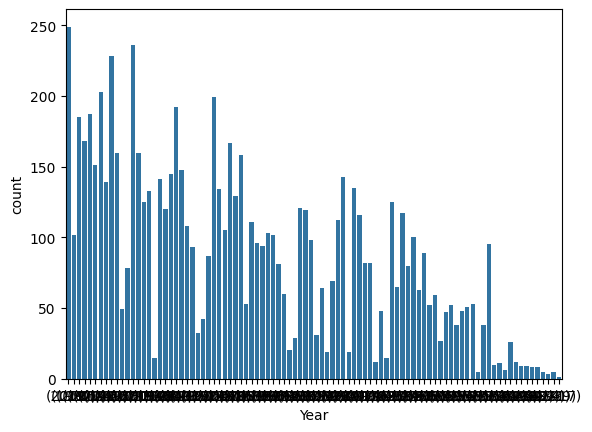

In [31]:
import seaborn as sns

# EDA
sns.countplot(data=data, x="Year")

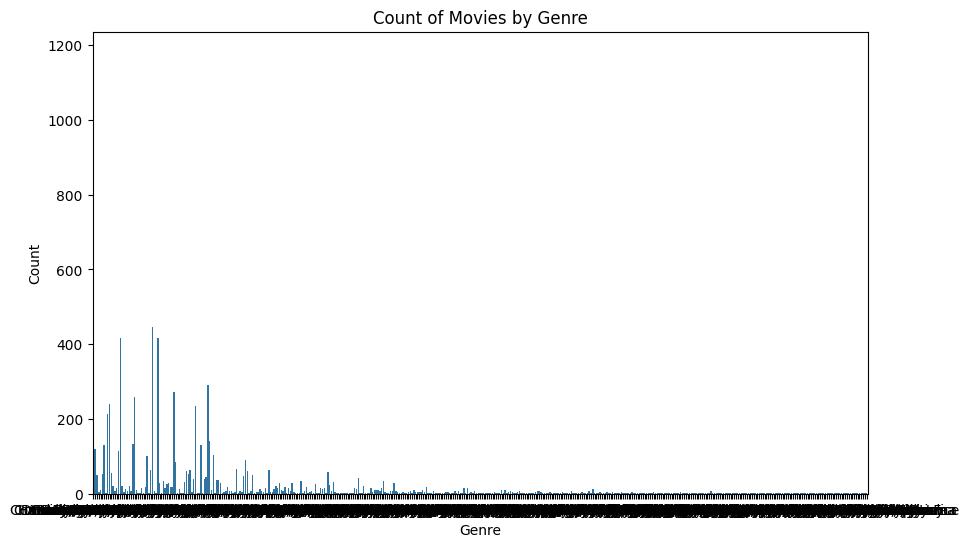

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.countplot(data=data,x="Genre")
plt.title("Count of Movies by Genre")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
genre_features = vectorizer.fit_transform(data['Genre']).toarray()
director_features = vectorizer.fit_transform(data['Director']).toarray()

# Check if 'Actors' column exists before processing
if 'Actors' in data.columns:
    actors_features = vectorizer.fit_transform(data['Actors']).toarray()
else:
    print("The 'Actors' column is missing.")

The 'Actors' column is missing.


In [34]:


# Convert the 'Year' column to numeric, handling potential errors
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

# Handle the 'Duration' column, handling potential errors
data['Duration'] = pd.to_numeric(data['Duration'].str.replace(' min', ''), errors='coerce')

# Combine text features for vectorization, handling missing values
data['Combined_Text'] = (
    data['Genre'].fillna('') + " " +
    data['Director'].fillna('') + " " +
    data['Actor 1'].fillna('') + " " +
    data['Actor 2'].fillna('') + " " +
    data['Actor 3'].fillna('')
)

In [35]:
print(data['Year'].dtype)
print(data['Year'].unique())
# Ensure Year is treated as a string, then extract the year
data['Year'] = data['Year'].astype(str).str.extract('(\d{4})').astype(float)

float64
[nan]


In [36]:
if 'data' not in globals():
    print("The variable 'data' is not defined. Please load the dataset first.")
else:
    print("The variable 'data' is already defined.")

The variable 'data' is already defined.


<Axes: xlabel='Director', ylabel='count'>

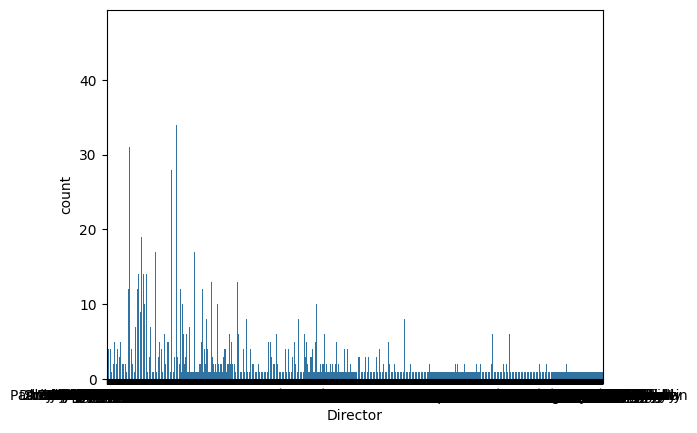

In [37]:
import seaborn as sns

# EDA

sns.countplot(data=data,x="Director")

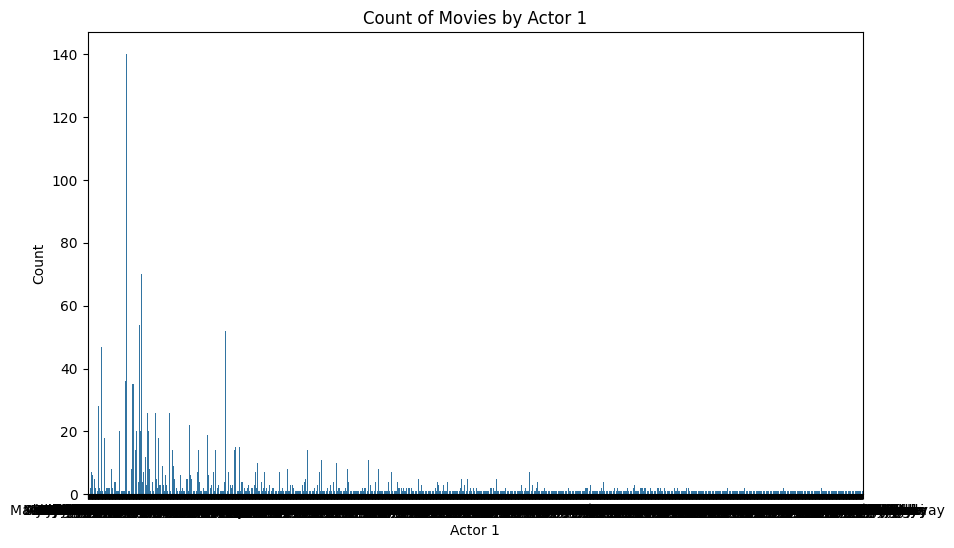

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.countplot(data=data,x="Actor 1")
plt.title("Count of Movies by Actor 1")
plt.xlabel("Actor 1")
plt.ylabel("Count")
plt.show()

In [39]:
import plotly.express as px
# Example 1: Bar Plot - Count of movies by Genre
fig_bar = px.bar(
    data,
    x='Genre',
    title='Count of Movies by Genre',
    color='Genre',
    labels={'Genre': 'Movie Genre'},
    height=400
)
fig_bar.update_layout(xaxis_title='Genre', yaxis_title='Count')
fig_bar.show()

In [40]:

# Convert 'Votes' column to numeric, coercing errors to NaN
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')

In [41]:
# Fill missing categorical values with 'Unknown'
categorical_cols = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
data[categorical_cols] = data[categorical_cols].fillna('Unknown')

In [42]:
#Convert 'Votes' to numeric
data['Votes'] = data['Votes'].replace(',', '', regex=True).astype(float, errors='ignore')

In [44]:


# Check if 'Actors' column exists before vectorizing
if 'Actors' in data.columns:
    actors_features = vectorizer.fit_transform(data['Actors']).toarray()
else:
    print("The 'Actors' column is not present in the DataFrame.")
    # Handle the case where the column is missing,
    # e.g., create an empty array or use a placeholder.
    actors_features = np.zeros((len(data), 1))  # Placeholder for missing 'Actors'



The 'Actors' column is not present in the DataFrame.


In [45]:


# Drop rows with NaN values in the 'Votes' column
data = data.dropna(subset=['Votes'])

# Scatter Plot - Rating vs Votes
fig_scatter = px.scatter(
    data,
    x='Votes',
    y='Rating',
    size='Votes',
    title='Rating vs Votes'
)
fig_scatter.show()

In [46]:
import numpy as np

# Check the shape of each array
print("Genre features shape:", genre_features.shape)
print("Director features shape:", director_features.shape)
print("Actors features shape:", actors_features.shape)

# Find the minimum number of rows (samples) across all features
min_size = min(genre_features.shape[0], director_features.shape[0], actors_features.shape[0])

# Trim all features to the minimum size
genre_features = genre_features[:min_size]
director_features = director_features[:min_size]
actors_features = actors_features[:min_size]

# Now, concatenate the features along the second axis (columns)
X = np.hstack([
    genre_features,
    director_features,
    actors_features,
])

# Verify the shape of the resulting array
print("Combined features shape:", X.shape)

Genre features shape: (7919, 24)
Director features shape: (7919, 3024)
Actors features shape: (7919, 1)
Combined features shape: (7919, 3049)


In [47]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
import numpy as np

# Define X and y (Replace this with your actual data)
# X is your features (e.g., your independent variables)
# y is your target variable (e.g., your dependent variable)

# Example:
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = np.random.randint(0, 2, size=100)  # Binary target variable (0 or 1)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the split sizes
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training features shape: (80, 5)
Testing features shape: (20, 5)
Training labels shape: (80,)
Testing labels shape: (20,)


In [48]:
# Train a Random Forest Regressor
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [49]:
# Evaluate the model
# Import necessary libraries
from sklearn.metrics import mean_squared_error
import numpy as np



y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [50]:
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.5269250421075089


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split # Import train_test_split

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'KNN Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

# Assume 'data' is your DataFrame containing the data
# Replace 'feature_columns' with the actual names of your feature columns
# Replace 'target_column' with the actual name of your target column
feature_columns = ['Votes']  # Example: Using 'Votes' as a feature
target_column = 'Rating'

# Split data into training and testing sets
X = data[feature_columns]
y = data[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the data

# Evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'Mean Squared Error': mse,
        'R2 Score': r2
    }

# Display results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"  Mean Squared Error: {metrics['Mean Squared Error']:.4f}")
    print(f"  R2 Score: {metrics['R2 Score']:.4f}")
    print()

Model: Linear Regression
  Mean Squared Error: 1.8402
  R2 Score: -0.0007

Model: KNN Regressor
  Mean Squared Error: 2.2245
  R2 Score: -0.2097

Model: Decision Tree
  Mean Squared Error: 2.2390
  R2 Score: -0.2176

Model: Random Forest
  Mean Squared Error: 2.1208
  R2 Score: -0.1533

Model: Gradient Boosting
  Mean Squared Error: 1.8622
  R2 Score: -0.0127

Model: XGBoost
  Mean Squared Error: 1.8991
  R2 Score: -0.0328



In [52]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 6, 4]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 150}
Best R2 Score: -0.0016649728637830503


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
X = data[['Votes']]  # Add more features if available
y = data['Rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [54]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 1.8401672520358114
R2 Score: -0.0007092405634780974


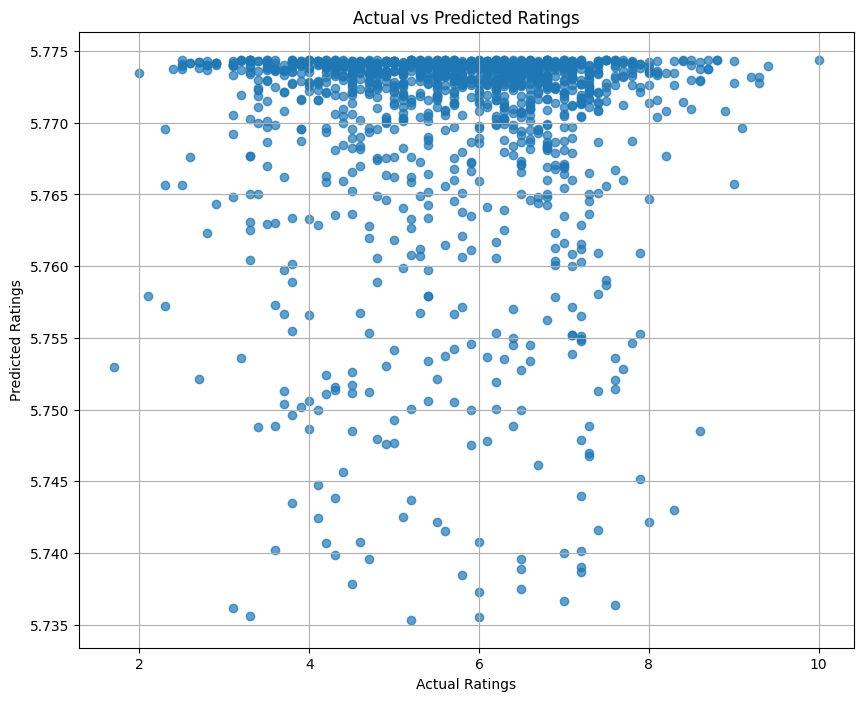

In [55]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.grid()
plt.show()